# Assignment

## Instructions

Complete the following exercise using Python.

Loan Approval Prediction:

Using the Loan Approval dataset, create an end-to-end workflow for predicting loan approval. Your workflow should include:

- Data loading and exploration
- Data preprocessing (handling missing values, encoding categorical variables, feature scaling)
- Feature selection
- Model training (using logistic regression and KNN)
- Model evaluation (using accuracy, precision, recall, F1-score and ROC AUC score)

```python
import pandas as pd
import numpy as np

# Load the dataset
loan_data = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/basic-dataset/refs/heads/master/Loan-Approval-Prediction.csv')

# Split features and target
X = loan_data.drop('Loan_Status', axis=1)
y = loan_data['Loan_Status']
```


In [120]:
# Import necessary libraries for the loan approval prediction assignment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# # Set display options for better output formatting
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# plt.style.use('default')

# Load the dataset
loan_data = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/basic-dataset/refs/heads/master/Loan-Approval-Prediction.csv')

print(f"Dataset Overview:")
print(f"Dataset shape: {loan_data.shape}")
print(f"Features: {list(loan_data.columns)}")
print("=" * 50)

# Display basic information about the dataset
print(f"Dataset Info:")
print(loan_data.info())
print("=" * 50)

# Display first few rows
print("First 5 rows of the dataset:")
print(loan_data.head())
print("=" * 50)

# Split features and target
X = loan_data.drop('Loan_Status', axis=1)
y = loan_data['Loan_Status']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("Target value counts:")
print(y.value_counts())
print("=" * 50)

# Check for missing values
print("Missing values in the dataset:")
missing_values = loan_data.isnull().sum()
missing_percentage = (loan_data.isnull().sum() / len(loan_data)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})

print(missing_df[missing_df['Missing Count'] > 0])

Dataset Overview:
Dataset shape: (614, 13)
Features: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11

## Numerical Feature Analysis

=== NUMERICAL FEATURES ANALYSIS ===
Numerical columns found: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
BASIC STATISTICS:
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%     

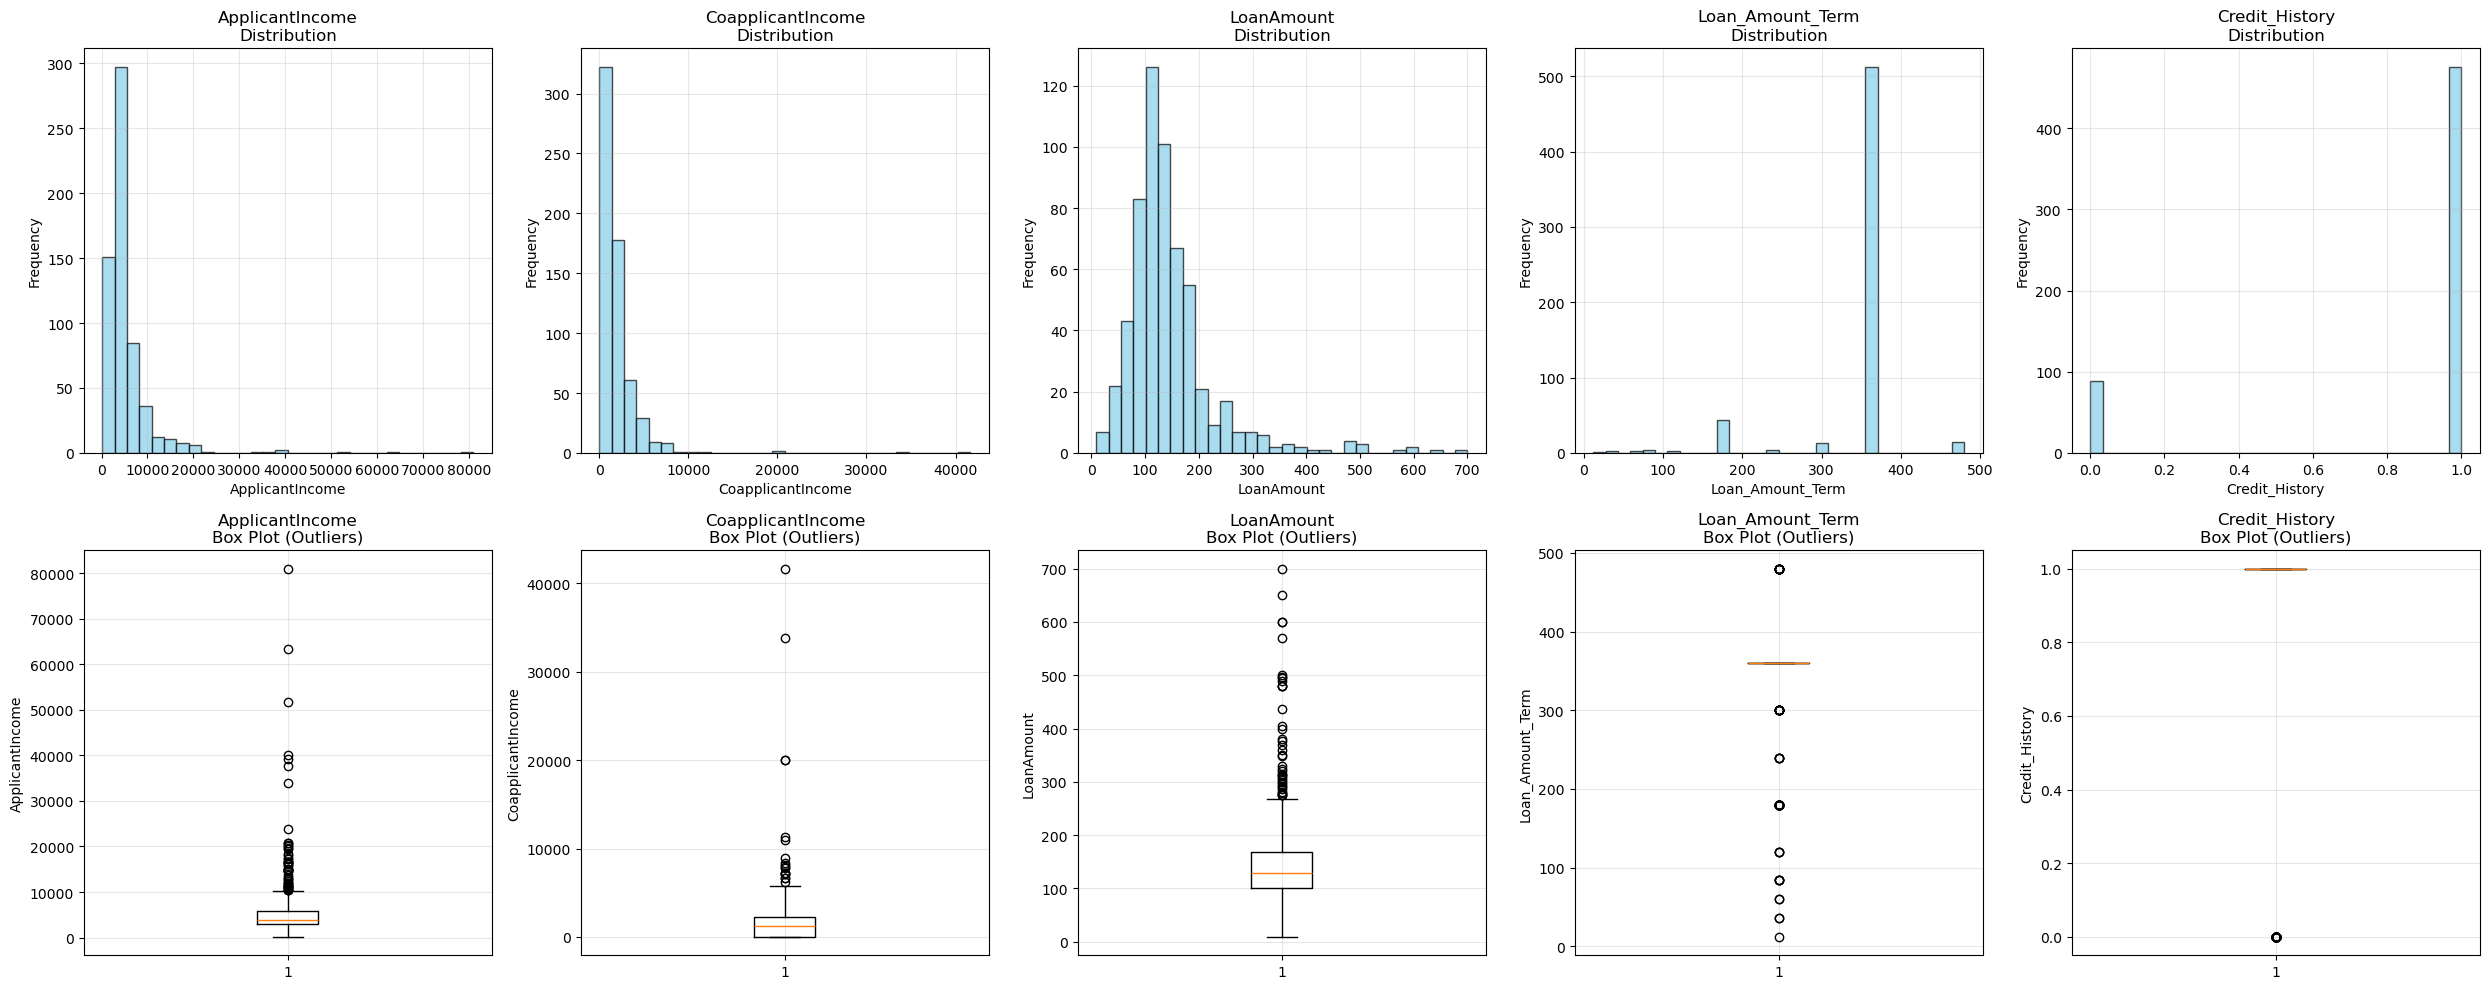


CORRELATION MATRIX:
                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.570909   
CoapplicantIncome        -0.116605           1.000000    0.188619   
LoanAmount                0.570909           0.188619    1.000000   
Loan_Amount_Term         -0.045306          -0.059878    0.039447   
Credit_History           -0.014715          -0.002056   -0.008433   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome           -0.045306       -0.014715  
CoapplicantIncome         -0.059878       -0.002056  
LoanAmount                 0.039447       -0.008433  
Loan_Amount_Term           1.000000        0.001470  
Credit_History             0.001470        1.000000  


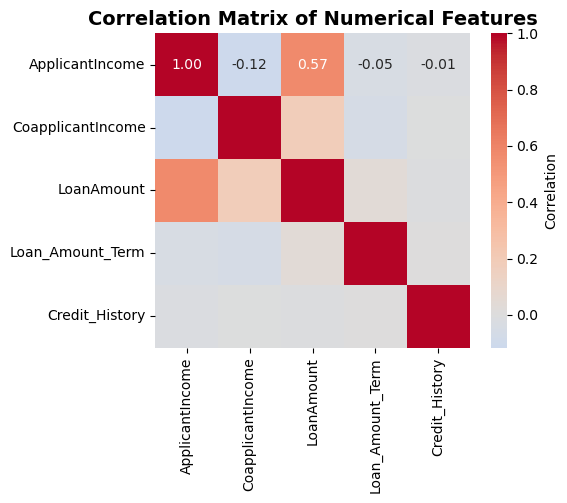

In [121]:
# Analyze numerical features for distribution, outliers, and shape
# This will help us choose the most appropriate scaling method

# Get numerical columns only
numerical_cols = loan_data.select_dtypes(include=[np.number]).columns.tolist()
print("=== NUMERICAL FEATURES ANALYSIS ===")
print(f"Numerical columns found: {numerical_cols}")
print("=" * 60)

# 1. Basic statistical analysis
print("BASIC STATISTICS:")
print(loan_data[numerical_cols].describe())
print("=" * 60)

# 2. Detailed analysis for each numerical feature
print("DETAILED FEATURE ANALYSIS:")
for col in numerical_cols:
    print(f"\n{col}:")
    print(f"  Range: {loan_data[col].min():.2f} to {loan_data[col].max():.2f}")
    print(f"  Mean: {loan_data[col].mean():.2f}, Std: {loan_data[col].std():.2f}")
    print(f"  Median: {loan_data[col].median():.2f}")
    print(f"  Skewness: {loan_data[col].skew():.2f}")
    
    # Calculate outliers using IQR method
    Q1 = loan_data[col].quantile(0.25)
    Q3 = loan_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((loan_data[col] < lower_bound) | (loan_data[col] > upper_bound)).sum()
    print(f"  Outliers (IQR method): {outliers} ({outliers/len(loan_data)*100:.1f}%)")

print("=" * 60)

# 3. Visualize distributions
print("CREATING DISTRIBUTION PLOTS...")

# Create subplots for distribution analysis
n_cols = len(numerical_cols)
fig, axes = plt.subplots(2, n_cols, figsize=(5*n_cols, 10))

if n_cols == 1:
    axes = axes.reshape(-1, 1)

# Histograms (top row)
for i, col in enumerate(numerical_cols):
    axes[0, i].hist(loan_data[col].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, i].set_title(f'{col}\nDistribution', fontsize=12)
    axes[0, i].set_xlabel(col)
    axes[0, i].set_ylabel('Frequency')
    axes[0, i].grid(True, alpha=0.3)

# Box plots (bottom row) - for outlier detection
for i, col in enumerate(numerical_cols):
    axes[1, i].boxplot(loan_data[col].dropna())
    axes[1, i].set_title(f'{col}\nBox Plot (Outliers)', fontsize=12)
    axes[1, i].set_ylabel(col)
    axes[1, i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 4. Correlation analysis
print("\nCORRELATION MATRIX:")
correlation_matrix = loan_data[numerical_cols].corr()
print(correlation_matrix)

# Visualize correlation matrix as heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix of Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()



#### Numerical Feature Analysis Observations:

**Scaling method comparison:**
1. Skewness values:
    - |skewness| < 0.5: Approximately normal → StandardScaler
    - 0.5 < |skewness| < 1: Moderately skewed → StandardScaler or RobustScaler
    - |skewness| > 1: Highly skewed → RobustScaler or consider transformation
2. Outlier percentages:
    - < 2%: Low outliers → StandardScaler works well
    - 2-5%: Moderate outliers → StandardScaler or RobustScaler
    - \> 5%: High outliers → RobustScaler recommended
3. Distribution shapes:
    - Normal-looking histograms → StandardScaler
    - Heavily skewed histograms → RobustScaler
    - Bounded ranges → MinMaxScaler might work well

**Analysis Results**
1. ApplicantIncome:
    - Highly skewed (skewness: 6.54)
    - High outliers (8.1%)
2. CoapplicantIncome:
    - Highly skewed (skewness: 7.49)
    - Moderate outliers (2.9%)
3. LoanAmount:
    - Highly skewed (skewness: 2.68)
    - High outliers (6.4%)
4. Loan_Amount_Term:
    - Highly skewed (skewness: -2.36)
    - High outliers (14.3%)
5. Credit_History:
    - Highly skewed (skewness: -1.88)
    - High outliers (14.5%)

**Robust Scaler seem to be more appropriate for high skewed, high outlier features**

**Feature to Feature Correlation Analysis**
- Low multicollinearity overall except for between ApplicantIncome and LoanAmount

NUMERICAL FEATURE-TO-TARGET CORRELATION ANALYSIS:
Target variable encoding:
- Y (Approved) = 1
- N (Rejected) = 0
Target distribution: {1: 422, 0: 192}

CORRELATION WITH LOAN APPROVAL:
(Positive = Higher values → More likely approved)
(Negative = Higher values → Less likely approved)
--------------------------------------------------
Credit_History      :  0.562 (STRONG positive)
ApplicantIncome     : -0.005 (WEAK negative)
Loan_Amount_Term    : -0.021 (WEAK negative)
LoanAmount          : -0.037 (WEAK negative)
CoapplicantIncome   : -0.059 (WEAK negative)

INTERPRETATION GUIDE:
|Correlation| > 0.3: STRONG predictive power
|Correlation| > 0.1: MODERATE predictive power
|Correlation| < 0.1: WEAK predictive power



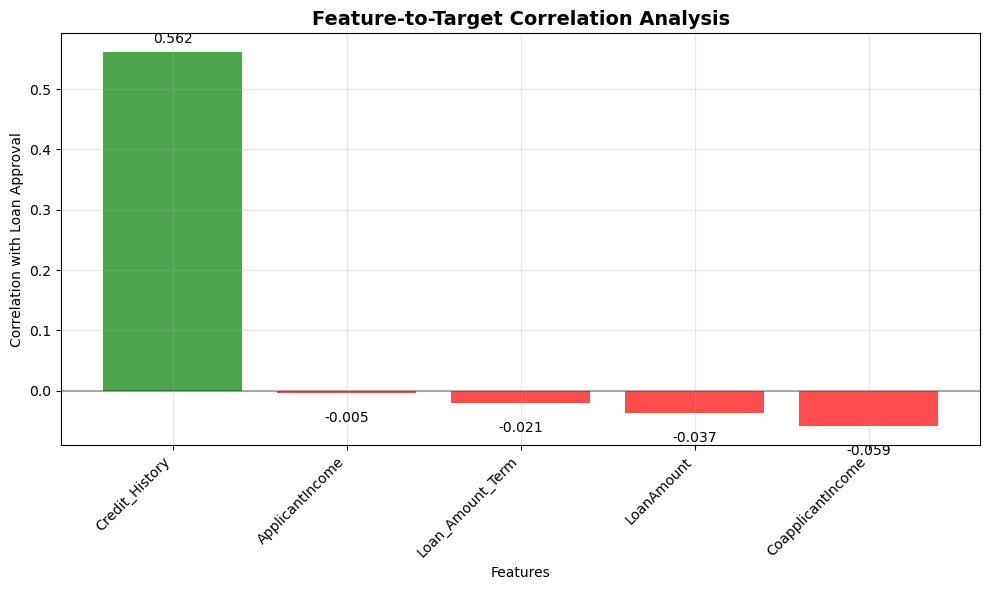

In [122]:
# NumericalFeature-to-Target Correlation Analysis
# This helps us understand which features actually predict loan approval

print("="*60)
print("NUMERICAL FEATURE-TO-TARGET CORRELATION ANALYSIS:")
print("="*60)

# Encode target variable for correlation calculation
loan_data_encoded = loan_data.copy()
loan_data_encoded['Loan_Status_encoded'] = (loan_data_encoded['Loan_Status'] == 'Y').astype(int)

print("Target variable encoding:")
print("- Y (Approved) = 1")
print("- N (Rejected) = 0")
print(f"Target distribution: {loan_data_encoded['Loan_Status_encoded'].value_counts().to_dict()}")
print()

# Calculate correlations with target
target_correlations = loan_data_encoded[numerical_cols + ['Loan_Status_encoded']].corr()['Loan_Status_encoded'].drop('Loan_Status_encoded')

print("CORRELATION WITH LOAN APPROVAL:")
print("(Positive = Higher values → More likely approved)")
print("(Negative = Higher values → Less likely approved)")
print("-" * 50)

target_correlations_sorted = target_correlations.sort_values(ascending=False)
for feature, corr in target_correlations_sorted.items():
    # Add interpretation
    if abs(corr) > 0.3:
        strength = "STRONG"
    elif abs(corr) > 0.1:
        strength = "MODERATE"
    else:
        strength = "WEAK"
    
    direction = "positive" if corr > 0 else "negative"
    print(f"{feature:20s}: {corr:6.3f} ({strength} {direction})")

print("\n" + "="*60)
print("INTERPRETATION GUIDE:")
print("="*60)
print("|Correlation| > 0.3: STRONG predictive power")
print("|Correlation| > 0.1: MODERATE predictive power") 
print("|Correlation| < 0.1: WEAK predictive power")
print()

# Visualize feature-to-target correlations
plt.figure(figsize=(10, 6))
colors = ['red' if x < 0 else 'green' for x in target_correlations_sorted.values]
bars = plt.bar(range(len(target_correlations_sorted)), target_correlations_sorted.values, color=colors, alpha=0.7)
plt.xlabel('Features')
plt.ylabel('Correlation with Loan Approval')
plt.title('Feature-to-Target Correlation Analysis', fontsize=14, fontweight='bold')
plt.xticks(range(len(target_correlations_sorted)), target_correlations_sorted.index, rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars, target_correlations_sorted.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + (0.01 if value > 0 else -0.03), 
             f'{value:.3f}', ha='center', va='bottom' if value > 0 else 'top')

plt.tight_layout()
plt.show()


#### Numerical Feature to Target Correlation
- Only Credit_history is a strong predictor of Loan_status

## Categorical Feature Analysis

CATEGORICAL FEATURE ANALYSIS
Categorical features to analyze: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
Number of categorical features: 6
FEATURE-TO-TARGET ANALYSIS:

GENDER:
----------------------------------------
Cross-tabulation (Counts):
Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339

Approval Rates by Category (%):
Loan_Status      N      Y
Gender                   
Female       33.04  66.96
Male         30.67  69.33

Chi-square test:
  Chi-square statistic: 0.1396
  p-value: 0.7087
  Degrees of freedom: 1
  Significant association: No
  Interpretation: Association is not significant (p ≥ 0.05)

MARRIED:
----------------------------------------
Cross-tabulation (Counts):
Loan_Status    N    Y
Married              
No            79  134
Yes          113  285

Approval Rates by Category (%):
Loan_Status      N      Y
Married                  
No           37.09  62.91
Yes          28.39  71.61

Chi-sq

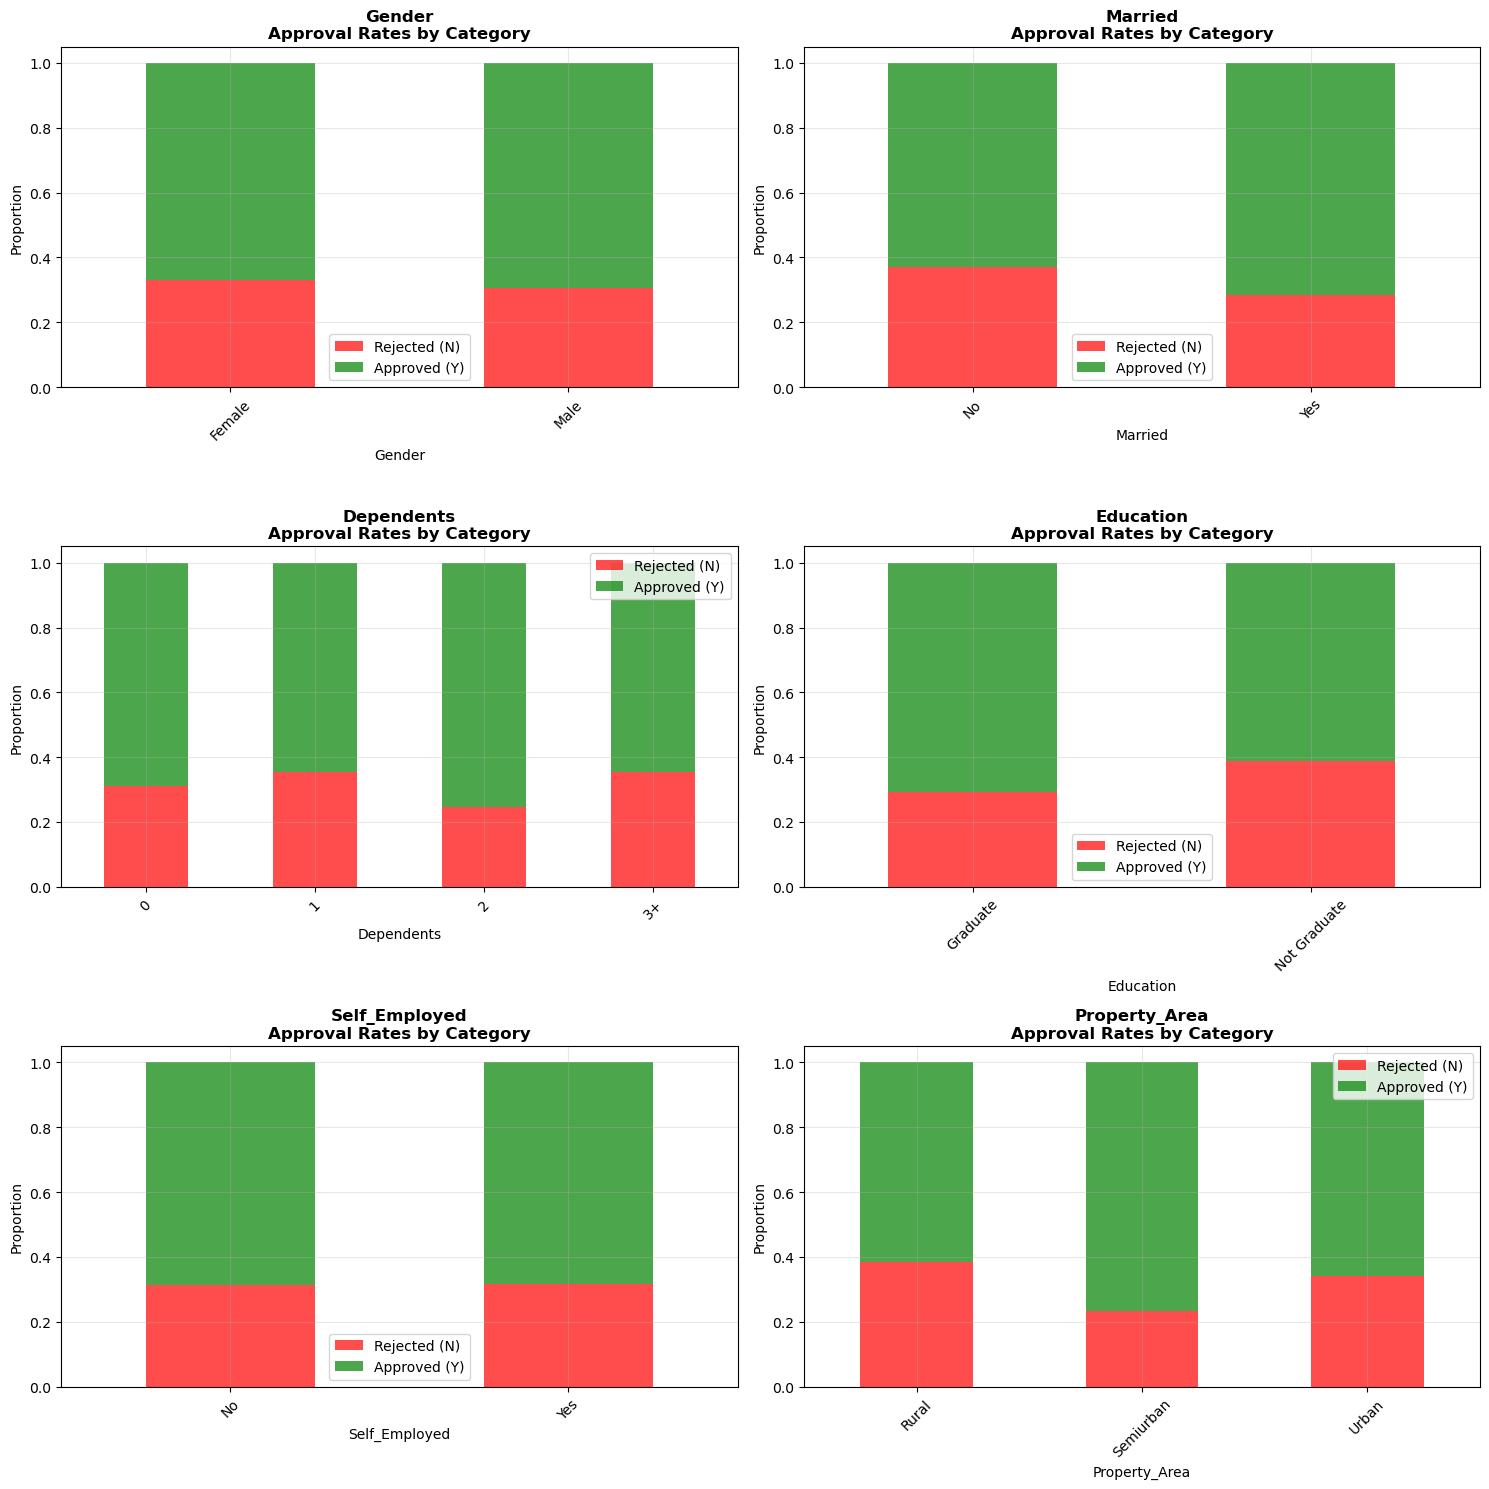


SUMMARY OF SIGNIFICANT FEATURES:
SIGNIFICANT PREDICTORS (p < 0.05):
  Married: p-value = 0.0344
  Education: p-value = 0.0431
  Property_Area: p-value = 0.0021

NON-SIGNIFICANT FEATURES (p ≥ 0.05):
  Gender: p-value = 0.7087
  Dependents: p-value = 0.3679
  Self_Employed: p-value = 1.0000

FEATURE IMPORTANCE RANKING (by Chi-square statistic):
1. Property_Area: p-value = 0.0021, Chi-square = 12.2976
2. Married: p-value = 0.0344, Chi-square = 4.4750
3. Education: p-value = 0.0431, Chi-square = 4.0915
4. Dependents: p-value = 0.3679, Chi-square = 3.1583
5. Gender: p-value = 0.7087, Chi-square = 0.1396
6. Self_Employed: p-value = 1.0000, Chi-square = 0.0000


In [123]:
# Categorical feature analysis

from scipy.stats import chi2_contingency

print("="*60)
print("CATEGORICAL FEATURE ANALYSIS")
print("="*60)

# Get categorical columns (excluding Loan_ID and Loan_Status)
categorical_cols = loan_data.select_dtypes(include=['object']).columns.tolist()
categorical_features = [col for col in categorical_cols if col not in ['Loan_ID', 'Loan_Status']]

print(f"Categorical features to analyze: {categorical_features}")
print(f"Number of categorical features: {len(categorical_features)}")
print("="*60)

# 1. FEATURE-TO-TARGET ANALYSIS
print("FEATURE-TO-TARGET ANALYSIS:")
print("="*60)

# Initialize results storage
chi_square_results = {}

for feature in categorical_features:
    print(f"\n{feature.upper()}:")
    print("-" * 40)
    
    # Cross-tabulation (counts)
    crosstab_counts = pd.crosstab(loan_data[feature], loan_data['Loan_Status'])
    print("Cross-tabulation (Counts):")
    print(crosstab_counts)
    
    # Cross-tabulation (percentages by row)
    crosstab_pct = pd.crosstab(loan_data[feature], loan_data['Loan_Status'], normalize='index') * 100
    print("\nApproval Rates by Category (%):")
    print(crosstab_pct.round(2))
    
    # Chi-square test
    chi2, p_value, dof, expected = chi2_contingency(crosstab_counts)
    chi_square_results[feature] = {'chi2': chi2, 'p_value': p_value, 'dof': dof}
    
    print(f"\nChi-square test:")
    print(f"  Chi-square statistic: {chi2:.4f}")
    print(f"  p-value: {p_value:.4f}")
    print(f"  Degrees of freedom: {dof}")
    print(f"  Significant association: {'Yes' if p_value < 0.05 else 'No'}")
    
    # Interpretation
    if p_value < 0.001:
        significance = "highly significant (p < 0.001)"
    elif p_value < 0.01:
        significance = "very significant (p < 0.01)"
    elif p_value < 0.05:
        significance = "significant (p < 0.05)"
    else:
        significance = "not significant (p ≥ 0.05)"
    
    print(f"  Interpretation: Association is {significance}")

# 2. VISUALIZATION
# Create subplots for all categorical features
n_features = len(categorical_features)
n_cols = 2
n_rows = (n_features + 1) // 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
if n_rows == 1:
    axes = axes.reshape(1, -1)
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    # Create cross-tabulation for visualization
    crosstab_viz = pd.crosstab(loan_data[feature], loan_data['Loan_Status'], normalize='index')
    
    # Stacked bar chart
    crosstab_viz.plot(kind='bar', stacked=True, ax=axes[i], 
                     color=['red', 'green'], alpha=0.7)
    axes[i].set_title(f'{feature}\nApproval Rates by Category', fontweight='bold')
    axes[i].set_ylabel('Proportion')
    axes[i].set_xlabel(feature)
    axes[i].legend(['Rejected (N)', 'Approved (Y)'])
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3. SUMMARY OF SIGNIFICANT FEATURES
print("\n" + "="*60)
print("SUMMARY OF SIGNIFICANT FEATURES:")
print("="*60)

significant_features = []
not_significant_features = []

for feature, results in chi_square_results.items():
    if results['p_value'] < 0.05:
        significant_features.append((feature, results['p_value']))
    else:
        not_significant_features.append((feature, results['p_value']))

if significant_features:
    print("SIGNIFICANT PREDICTORS (p < 0.05):")
    for feature, p_val in significant_features:
        print(f"  {feature}: p-value = {p_val:.4f}")
else:
    print("No features show significant association with loan approval")

if not_significant_features:
    print("\nNON-SIGNIFICANT FEATURES (p ≥ 0.05):")
    for feature, p_val in not_significant_features:
        print(f"  {feature}: p-value = {p_val:.4f}")

# 4. FEATURE IMPORTANCE RANKING
print("\n" + "="*60)
print("FEATURE IMPORTANCE RANKING (by Chi-square statistic):")
print("="*60)

# Sort by significance (p < 0.05), then by chi-square
feature_importance = sorted(chi_square_results.items(), 
                           key=lambda x: x[1]['p_value'], reverse=False)

for i, (feature, results) in enumerate(feature_importance, 1):
    print(f"{i}. {feature}: p-value = {results['p_value']:.4f}, Chi-square = {results['chi2']:.4f}")


## Preprocesssing and Pipeline Setup

Preprocessing requirements from feature analysis:
- Feature Selection:
    - Numerical features to only keep Credit_History, ApplicantIncome, LoanAmount (the later two more for business logic as besides Credit_History all other numerical features were very weak predictors)
    - Cateogrical features to only keep significant ones (Property_Area, Married, Education)
- Missing Values:
    - Credit_History: Decided to keep the missing and create a new category, this requires converting the numerical to a categorical feature and replacing nan with 'Missing'
    - Numerical features (LoanAmount) handled by imputing median
    - Categorical features (Married) handled by `OneHotEncoder` with `handle_unknown='ignore'` (creates zeros for missing values)
- Scaling: Robust Scaling adopted due to high skewed and high outlier in numerical features
- Encoding: One Hot for Credit_History, Label for Property_Area, Married, Education (using equivalent of `OneHotEncoder` with `drop='first'`) 

In [124]:
# Data Preprocessing and Pipeline Setup
# Adapting the lesson's approach to our loan approval data

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Step 1: Feature Selection
# Define features to keep
features_to_keep = {
    'numerical': ['ApplicantIncome', 'LoanAmount'],
    'categorical': ['Credit_History', 'Property_Area', 'Married', 'Education']
}

features_to_drop = ['Loan_ID', 'Gender', 'Self_Employed', 'Dependents',
                   'CoapplicantIncome', 'Loan_Amount_Term']
# Select features
selected_features = features_to_keep['numerical'] + features_to_keep['categorical']

print(f"Features to keep: {features_to_keep}")
print(f"Features to drop: {features_to_drop}")

# Step 2: Handle Missing Values (Special handling for Credit_History)

# Create a copy for preprocessing
loan_data_processed = loan_data.copy()

# Special handling for Credit_History: Convert to categorical with 'Missing'
print("\nConverting Credit_History to categorical with 'Missing' category...")
loan_data_processed['Credit_History'] = loan_data_processed['Credit_History'].fillna('Missing')
loan_data_processed['Credit_History'] = loan_data_processed['Credit_History'].astype(str)

# Verify the conversion
print("Credit_History categories after conversion:")
print(loan_data_processed['Credit_History'].value_counts())

# Step 3: Prepare Data for Pipeline
print("\nDATA FOR PIPELINE:")
# Select only the features we want to keep
X = loan_data_processed[selected_features].copy()
y = loan_data_processed['Loan_Status']

print(f"Feature matrix shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Selected features: {list(X.columns)}")

# Step 4: Split Data
print("\nSPLIT DATA:")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Training target distribution: {y_train.value_counts().to_dict()}")
print(f"Test target distribution: {y_test.value_counts().to_dict()}")

# Step 5: Create Preprocessing Pipelines
print("\nCREATE NUMERICAL AND CATEGORICAL TRANSFORMERS:")

# Numerical transformer (for ApplicantIncome and LoanAmount)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Handle any remaining missing values
    ('scaler', RobustScaler())  # Robust scaling for skewed data with outliers
])

# Categorical transformer for one-hot encoding (Credit_History, Property_Area)
categorical_onehot_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Categorical transformer for label encoding (Married, Education)
# For binary features, we'll use OneHotEncoder with drop='first' which is equivalent to LabelEncoder
# but works better in ColumnTransformer pipelines
categorical_label_transformer = Pipeline(steps=[
    ('label', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

print("Numerical transformer created for:", features_to_keep['numerical'])
print("Categorical onehot transformer created for: Credit_History, Property_Area")
print("Categorical label transformer created for: Married, Education")

# Step 6: Create ColumnTransformer
print("\nCREATE COMBINED PREPROCESSING TRANSFORMER USING COLUMN TRANSFORMER")

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, features_to_keep['numerical']),
        ('cat_onehot', categorical_onehot_transformer, ['Credit_History', 'Property_Area']),
        ('cat_label', categorical_label_transformer, ['Married', 'Education'])
    ]
)

print("Preprocessor created with:")
print("- Numerical features:", features_to_keep['numerical'])
print("- Categorical onehot features: ['Credit_History', 'Property_Area']")
print("- Categorical label features: ['Married', 'Education']")

# Step 7: Create Complete Pipelines
print("\nCREATE COMPLETE PIPELINES:")

# Logistic Regression Pipeline
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(random_state=42, max_iter=1000))
])

# KNN Pipeline (same preprocessing for now, can be adjusted)
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', KNeighborsClassifier(n_neighbors=5))
])

print("Logistic Regression pipeline created")
print("KNN pipeline created")


Features to keep: {'numerical': ['ApplicantIncome', 'LoanAmount'], 'categorical': ['Credit_History', 'Property_Area', 'Married', 'Education']}
Features to drop: ['Loan_ID', 'Gender', 'Self_Employed', 'Dependents', 'CoapplicantIncome', 'Loan_Amount_Term']

Converting Credit_History to categorical with 'Missing' category...
Credit_History categories after conversion:
Credit_History
1.0        475
0.0         89
Missing     50
Name: count, dtype: int64

DATA FOR PIPELINE:
Feature matrix shape: (614, 6)
Target shape: (614,)
Selected features: ['ApplicantIncome', 'LoanAmount', 'Credit_History', 'Property_Area', 'Married', 'Education']

SPLIT DATA:
Training set: (491, 6)
Test set: (123, 6)
Training target distribution: {'Y': 337, 'N': 154}
Test target distribution: {'Y': 85, 'N': 38}

CREATE NUMERICAL AND CATEGORICAL TRANSFORMERS:
Numerical transformer created for: ['ApplicantIncome', 'LoanAmount']
Categorical onehot transformer created for: Credit_History, Property_Area
Categorical label tr

Training Logistic Regression pipeline...
Logistic Regression model trained successfully
Predictions generated for training and test sets

Training KNN pipeline...
KNN model trained successfully
Predictions generated for training and test sets

EVALUATING BOTH MODELS
------------------------------

Logistic Regression Results:
------------------------------
Accuracy    : 0.8537
Precision   : 0.8317
Recall      : 0.9882
F1-Score    : 0.9032
ROC AUC     : 0.8495

KNN Results:
------------------------------
Accuracy    : 0.7805
Precision   : 0.7843
Recall      : 0.9412
F1-Score    : 0.8556
ROC AUC     : 0.6986


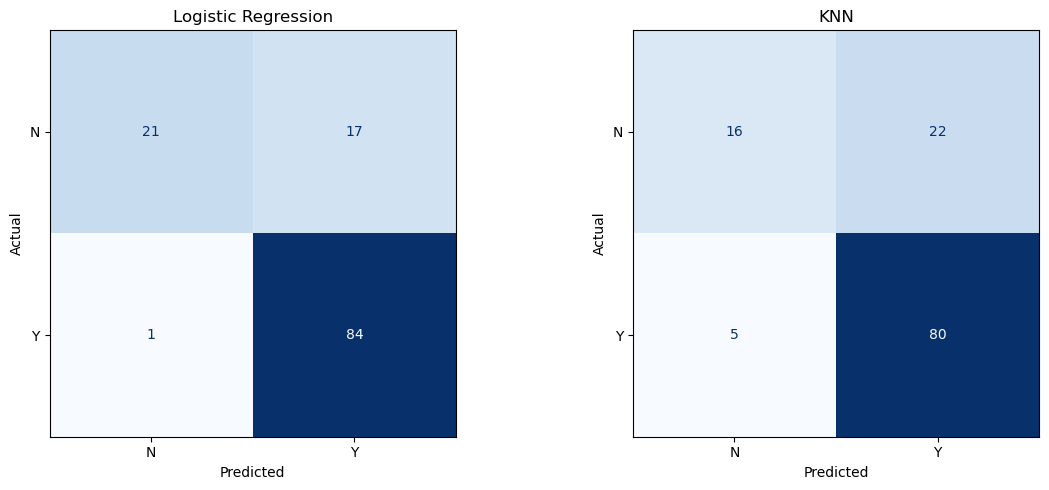

In [125]:
# Model Training and Evaluation
# Training both Logistic Regression and KNN models using pipelines

# Step 1: Train Logistic Regression Model
print("Training Logistic Regression pipeline...")
lr_pipeline.fit(X_train, y_train)
print("Logistic Regression model trained successfully")

# Make predictions
lr_train_pred = lr_pipeline.predict(X_train)
lr_test_pred = lr_pipeline.predict(X_test)
lr_test_proba = lr_pipeline.predict_proba(X_test)[:, 1]  # Probability of positive class

print("Predictions generated for training and test sets")

# Step 2: Train KNN Model
print("\nTraining KNN pipeline...")
knn_pipeline.fit(X_train, y_train)
print("KNN model trained successfully")

# Make predictions
knn_train_pred = knn_pipeline.predict(X_train)
knn_test_pred = knn_pipeline.predict(X_test)
knn_test_proba = knn_pipeline.predict_proba(X_test)[:, 1]  # Probability of positive class

print("Predictions generated for training and test sets")

# Step 3: Model Evaluation Functions
def evaluate_model(y_true, y_pred, y_proba, model_name):
    """Evaluate model performance and return metrics"""
    
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, pos_label='Y')
    recall = recall_score(y_true, y_pred, pos_label='Y')
    f1 = f1_score(y_true, y_pred, pos_label='Y')
    roc_auc = roc_auc_score(y_true == 'Y', y_proba)
    
    # Create results dictionary
    results = {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC AUC': roc_auc
    }
    
    return results

def print_model_results(results, model_name):
    """Print formatted model results"""
    print(f"\n{model_name} Results:")
    print("-" * 30)
    for metric, value in results.items():
        if metric != 'Model':
            print(f"{metric:12s}: {value:.4f}")

# Step 4: Evaluate Both Models
print("\nEVALUATING BOTH MODELS")
print("-" * 30)

# Evaluate Logistic Regression
lr_results = evaluate_model(y_test, lr_test_pred, lr_test_proba, 'Logistic Regression')
print_model_results(lr_results, 'Logistic Regression')

# Evaluate KNN
knn_results = evaluate_model(y_test, knn_test_pred, knn_test_proba, 'KNN')
print_model_results(knn_results, 'KNN')

# Step 5: Confusion Matrices

# Create confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Logistic Regression confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, lr_test_pred, ax=axes[0], 
                                       cmap='Blues', colorbar=False)
axes[0].set_title('Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# KNN confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, knn_test_pred, ax=axes[1], 
                                       cmap='Blues', colorbar=False)
axes[1].set_title('KNN')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()



## Model Comparison

Logistic Regression is the better performing model